# Effects of socio-economics changes on population suicide rates

## Investigation Overview

In this investigation, I wanted to look at the characteristics of df that could be used to predict their prices. The main focus was on the four Cs of df: carat (weight), cut grade, color grade, and clarity grade.

## Dataset Overview

The data consisted of prices and attributes of approximately 54,000 round-cut df. The attributes included the four Cs of df, as well as additional measurements such as table, depth, and dimensions. Thirty-nine data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('master.csv')

In [3]:
#Rename some columns of the dataframe
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


## ***Distribution of suicides number***

suicides number in the dataset does not take on a very large range of values.

``



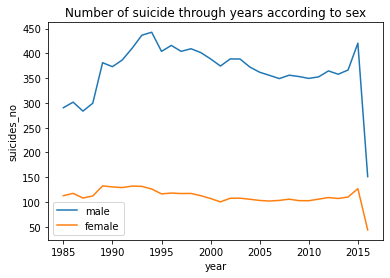

In [4]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.title("Number of suicide through years according to sex")
plt.show()

As we can see, from  1985 to 215 man always have a highest suicide rate than women

# ***Distribution of age***
It seems that the suicide rate to 75+ years is the highest

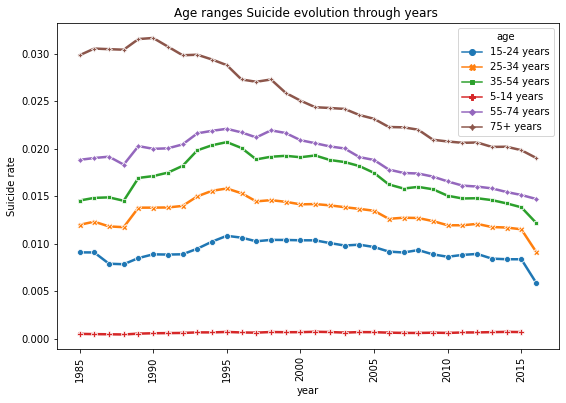

In [5]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.ylabel("Suicide rate")
plt.title('Age ranges Suicide evolution through years ')
plt.show()

Even if the suicide rate decreeased considerably in 75+ age range, it's still the highest, and the '5-14' age range has the lowest suicide range

# ***Distribution of country***

In [6]:
df_age = df.groupby(["country"])["suicides_no", "population"].sum()
df_country = df_age.copy().reset_index()
df_country

,country,suicides_no,population
0,Albania,1970,62325467
1,Antigua and Barbuda,11,1990228
2,Argentina,82219,1035985431
3,Armenia,1905,77348173
4,Aruba,101,1259677
...,...,...,...
96,United Arab Emirates,622,36502275
97,United Kingdom,136805,1738767780
98,United States,1034013,8054027201
99,Uruguay,13138,84068943


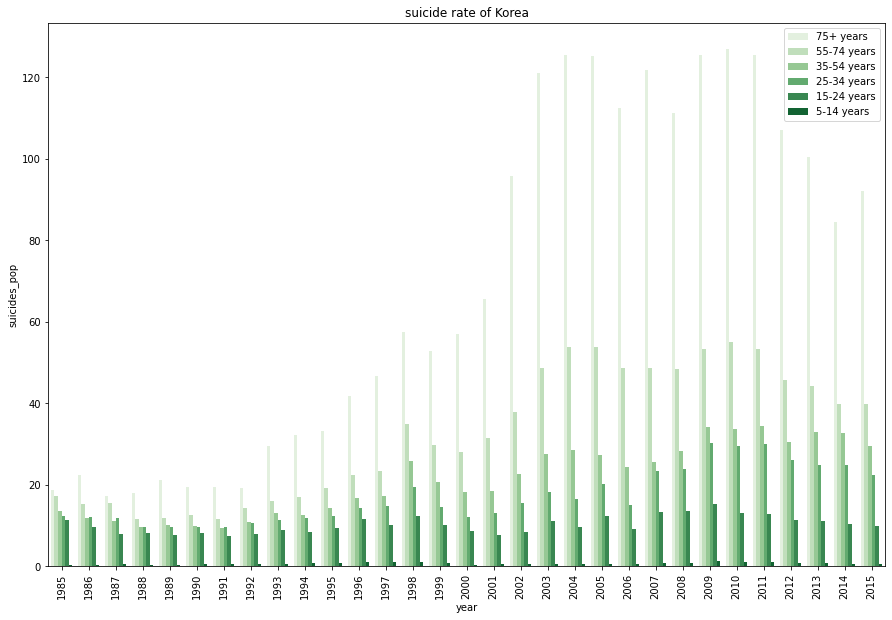

In [7]:
plt.figure(figsize = (15,10))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Republic of Korea"]) , palette = 'Greens' )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()    
plt.show()

As the general plot, in Korea 75+ age range have highest suicde rate, and their suicide rate increased over the years

# Distribution of generation

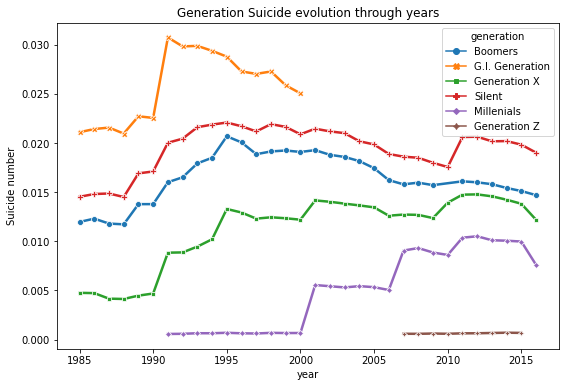

In [12]:
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.title('Generation Suicide evolution through years')
plt.ylabel('Suicide number')
plt.show()


Prior to 2000, the G.I. generation had the highest suicide rate, also known as the WW2 generation. This generation experienced economic and social turmoil as they suffered from the pre-World War II global depression, when incomes, profits and taxes were greatly reduced.

Did this kind of social influence increase the G.I. suicide rate? generation? The suicide rate is not that high compared to the post-2000 silent generation.